# Altum Image Processing

A three-dimensional data set (e.g., 4276 x 1897 x 7) for the give image (nov13_chunk8_low_v2_plusdem.tif) captured by ARM Aerial Facility camera (Altum) is provided to you.  The first two dimensions are horizontal coverage (length, width) of the image and the third dimension has information on spectral bands or other related fields. Additional info on this image is provided in “Metadata.txt”.

Camera spectral bands: 
- Blue 475 nm: B1
- Green 560 nm: B2
- Red 668 nm: B3
- Red edge 717 nm: B4
- Near infrared 840 nm: B5
- Thermal 11 μm

### Exercise:

- Can you open the image file: “nov13_chunk8_low_v2_plusdem.tif”
- Check if the dimension of this file is as per specifications provided above
- Extract the individual seven data set from the third dimension


In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
%config InlineBackend.figure_format='retina'

In [6]:
temp = np.loadtxt('Temperature_in_C.dat')
b1 = np.loadtxt('Reflectance_band_1.dat')
b2 = np.loadtxt('Reflectance_band_2.dat')
b3 = np.loadtxt('Reflectance_band_3.dat')
b4 = np.loadtxt('Reflectance_band_4.dat')
b5 = np.loadtxt('Reflectance_band_5.dat')
elev = np.loadtxt('Elevation_in_meters.dat')

# Quality checks
elev = np.where(elev == -32767, np.nan, elev)
b1 = np.where(b1 == 1, np.nan, b1)
b2 = np.where(b2 == 1, np.nan, b2)
b3 = np.where(b3 == 1, np.nan, b3)
b4 = np.where(b4 == 1, np.nan, b4)
b5 = np.where(b5 == 1, np.nan, b5)
temp = np.where(temp == 1, np.nan, temp)

## Plotting the image channels

- See how the reflectance from five spectral bands look different 

<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:30: SyntaxWarning: invalid escape sequence '\d'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_67847/874227112.py:30: SyntaxWarning: invalid escape sequence '\d'
  ax[1,2].set_title('Temperature ($\degree$C)')


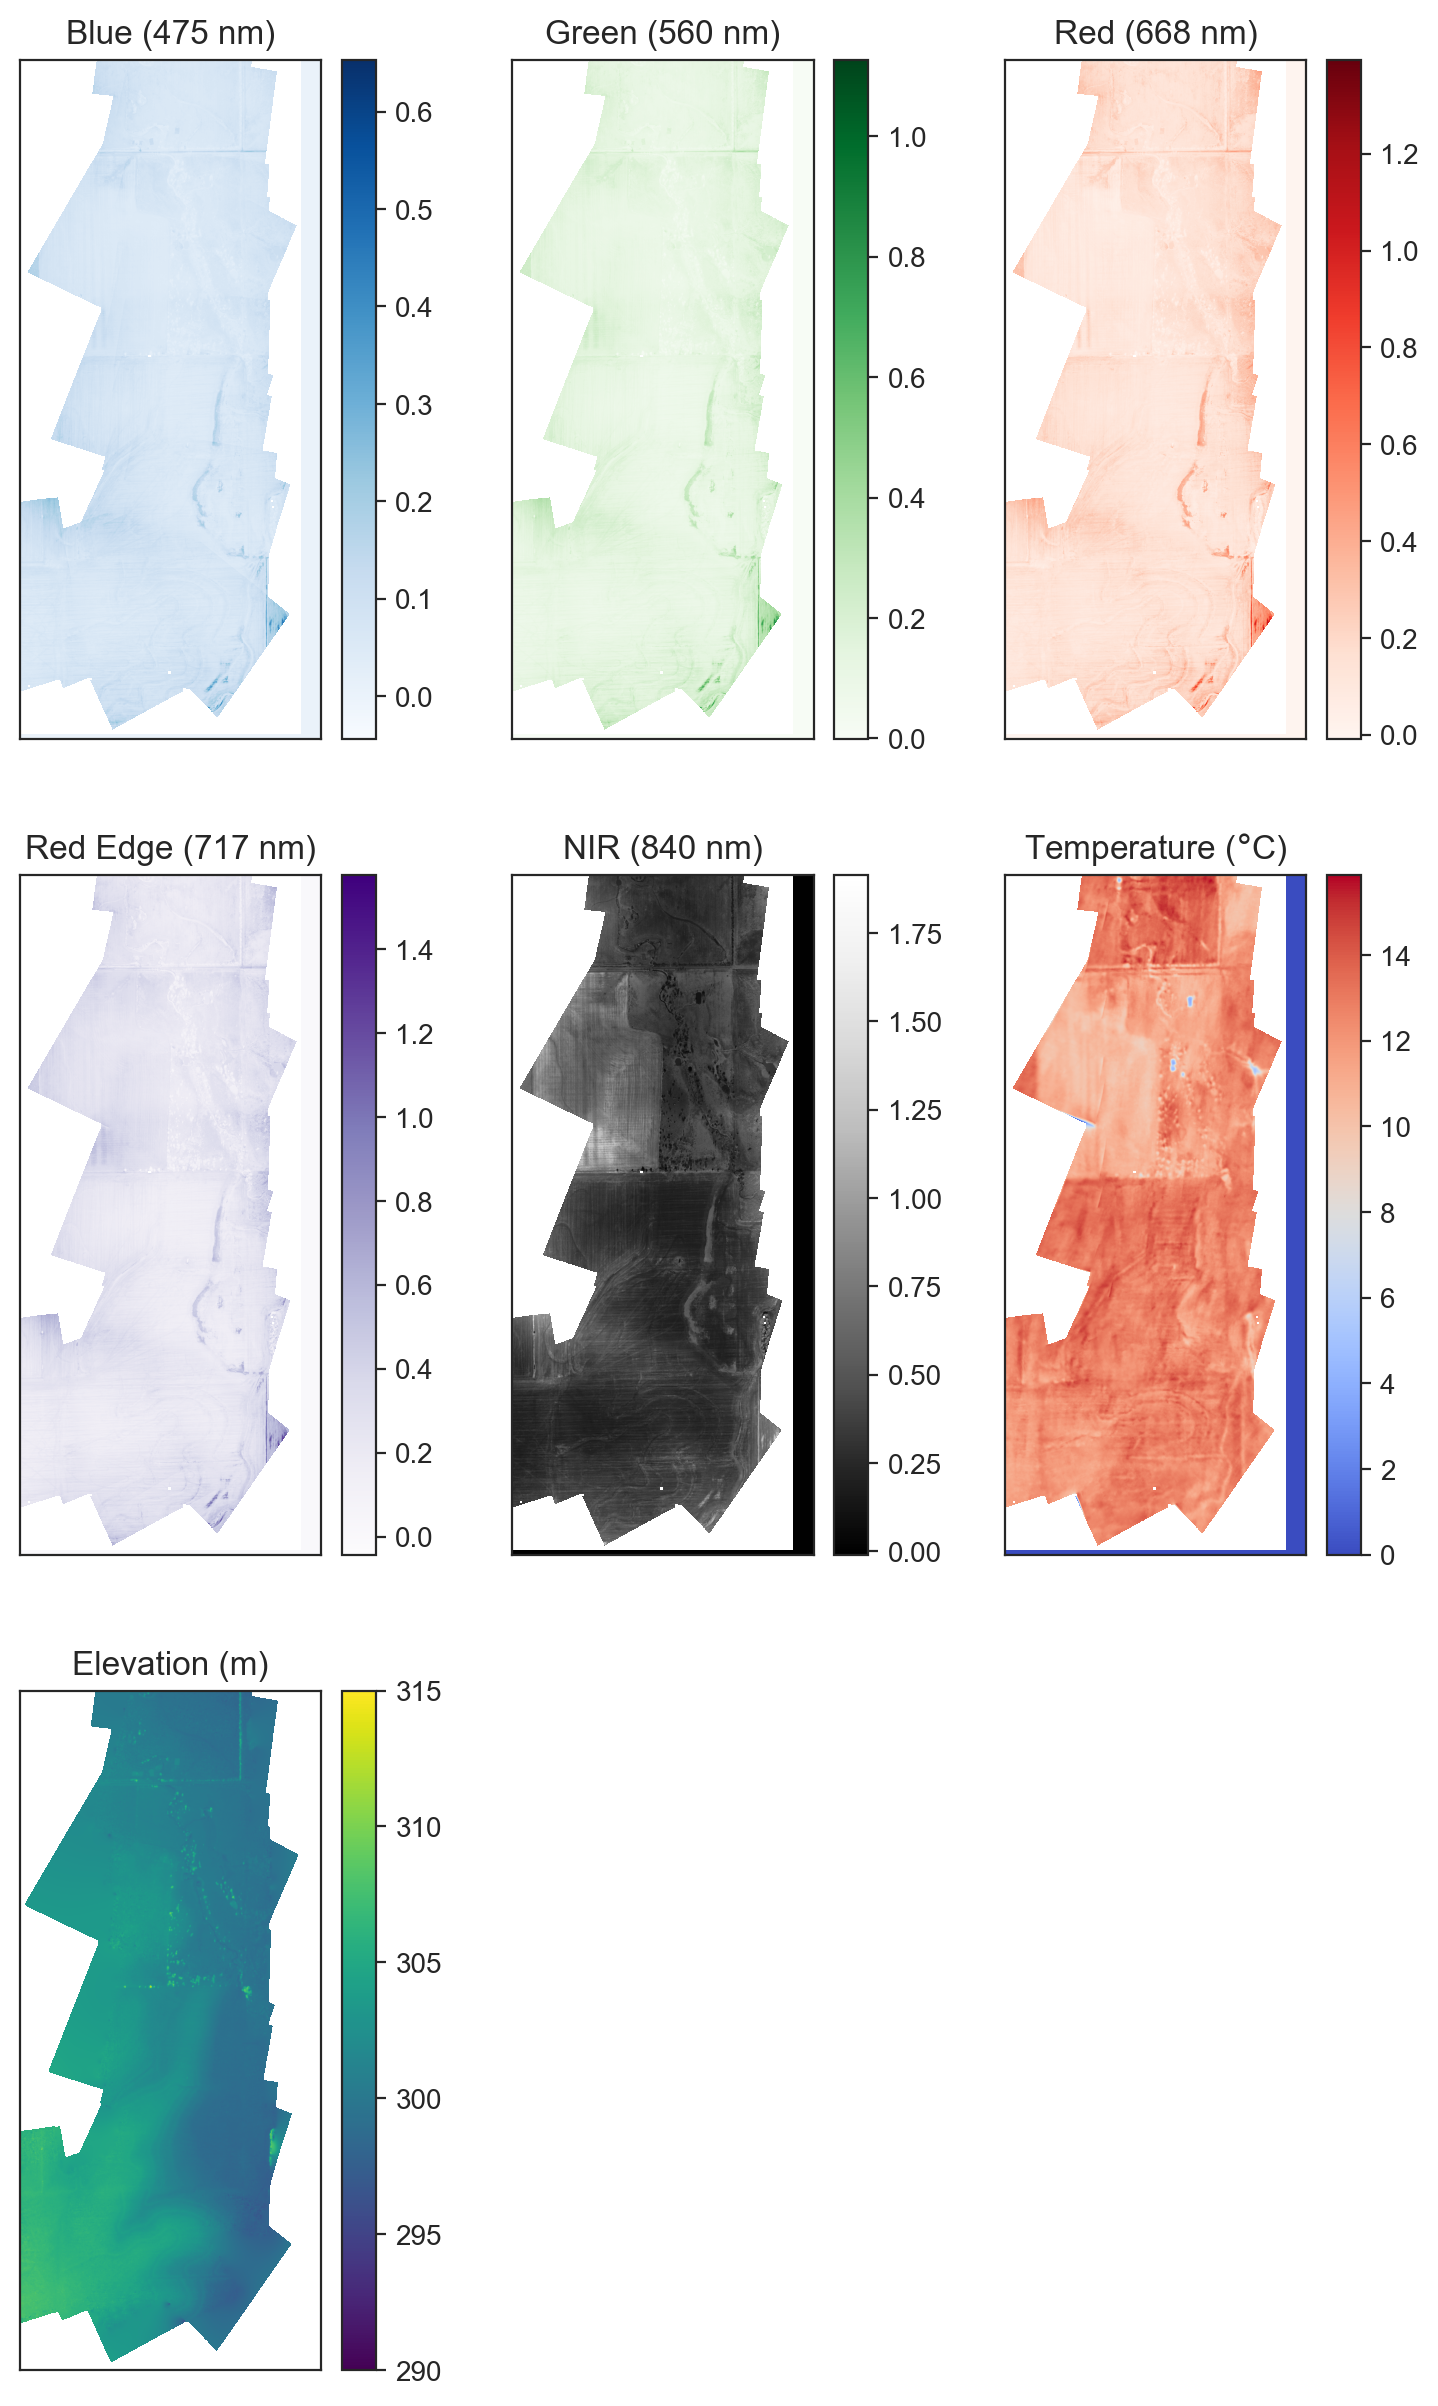

In [16]:
fig, ax = plt.subplots(3,3, figsize = (9,15))

im = ax[0,0].imshow(b1, cmap = 'Blues')
plt.colorbar(im)

im = ax[0,1].imshow(b2, cmap = 'Greens')
plt.colorbar(im)

im = ax[0,2].imshow(b3, cmap = 'Reds')
plt.colorbar(im)

im = ax[1,0].imshow(b4, cmap = 'Purples')
plt.colorbar(im)

im = ax[1,1].imshow(b5, cmap = 'Greys_r')
plt.colorbar(im)

im = ax[1,2].imshow(temp, cmap = 'coolwarm')
plt.colorbar(im)

im = ax[2,0].imshow(elev, cmap = 'viridis', vmin = 290, vmax = 315)
plt.colorbar(im)

# plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
ax[0,0].set_title('Blue (475 nm)')
ax[0,1].set_title('Green (560 nm)')
ax[0,2].set_title('Red (668 nm)')
ax[1,0].set_title('Red Edge (717 nm)')
ax[1,1].set_title('NIR (840 nm)')
ax[1,2].set_title('Temperature ($\degree$C)')
ax[2,0].set_title('Elevation (m)')
fig.delaxes(ax[2,1])
fig.delaxes(ax[2,2])

for ax_i in ax.ravel():
    ax_i.set_xticks([])
    ax_i.set_yticks([])

## True-color image

- Can you create a true color image from the provided data set?

This image does not look exactly like the actual RGB (it's darker!) because these bands do not capture the full red, blue, and green spectra - they are bands and thus subsets of the entire wavelength spectrum.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Constructed RGB Image')

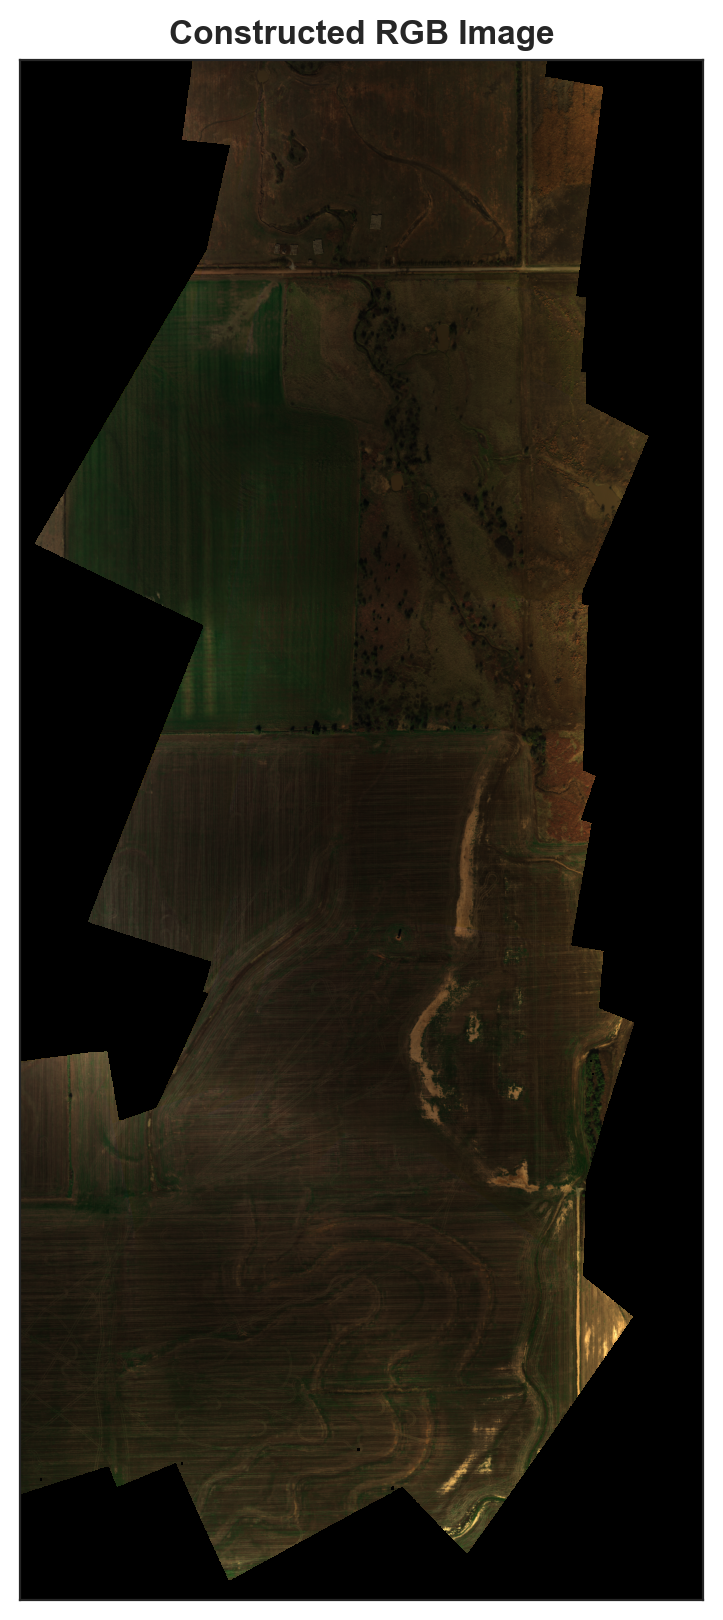

In [19]:
rgb = np.dstack((b3, b2, b1)) # Zip all three arrays togethear
fig, ax = plt.subplots(figsize = (10, 10))

ax.imshow(rgb);
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Constructed RGB Image', weight = 'bold')

# Reflectance indices

- Can you create any product from the reflectance data?
- Estimate the presence of vegetation using Normalized Difference Vegetation Index:

$$ NDVI = \frac{NIR - R}{NIR + R}$$ 


/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_67847/2757786689.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi = (b5 - b3) / (b5 + b3)


[]

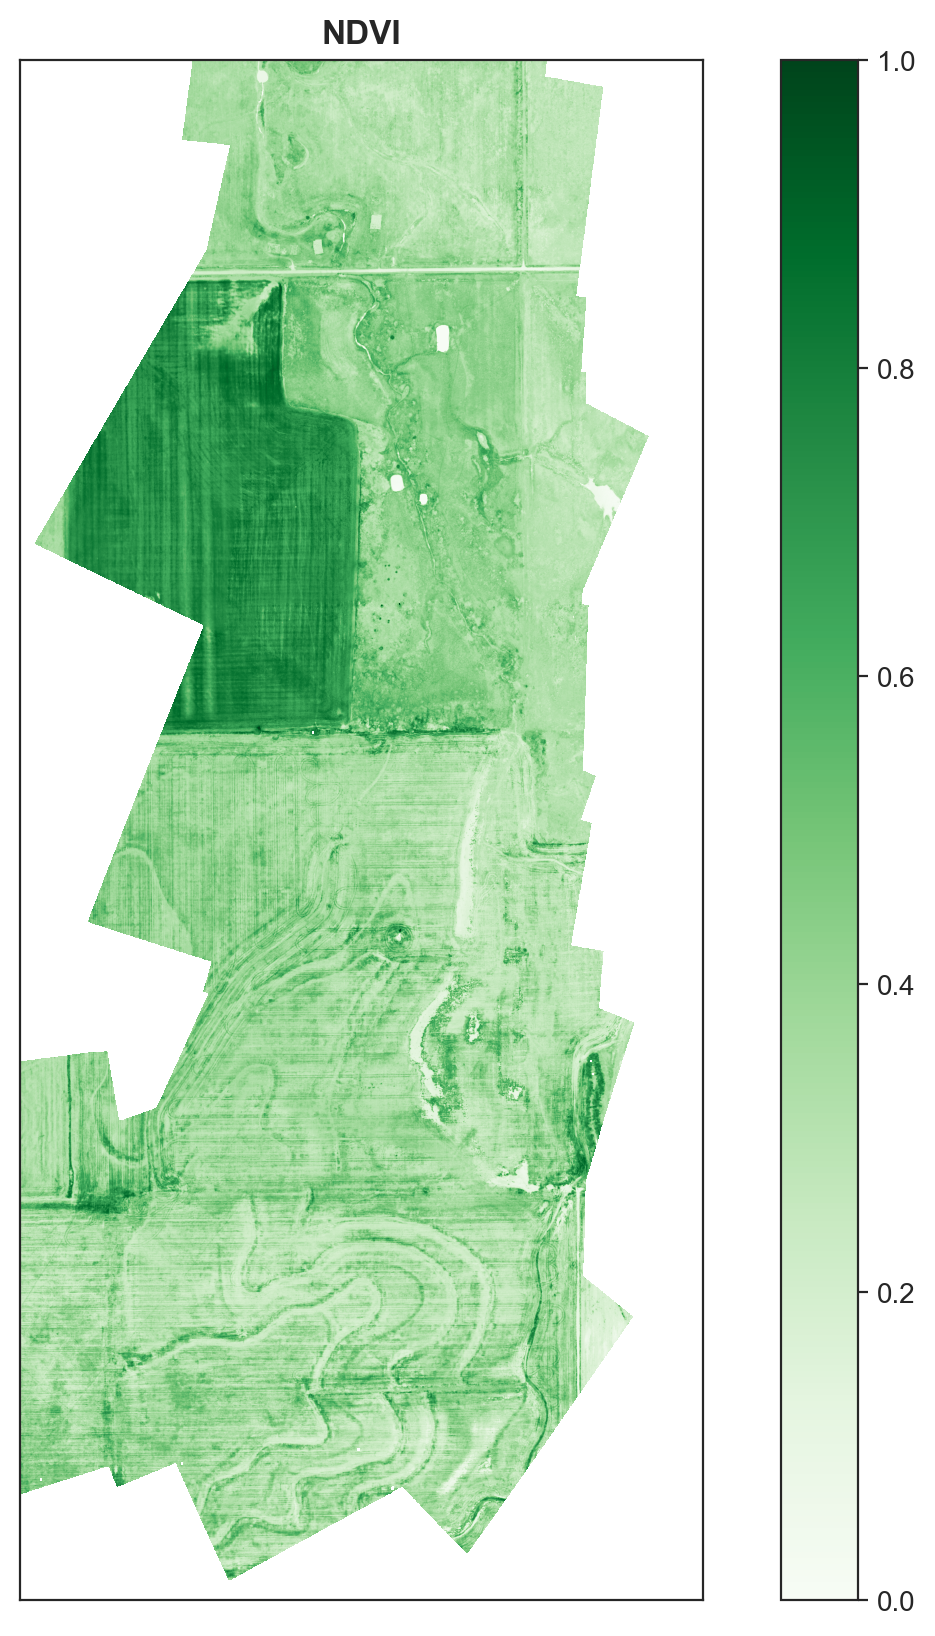

In [22]:
ndvi = (b5 - b3) / (b5 + b3)

fig, ax = plt.subplots(figsize = (10, 10))

im = ax.imshow(ndvi, cmap = 'Greens', vmin = 0, vmax = 1)
plt.colorbar(im)
ax.set_title('NDVI', weight = 'bold')

ax.set_xticks([])
ax.set_yticks([])

Text(0.5, 1.0, 'Histogram of NDVI')

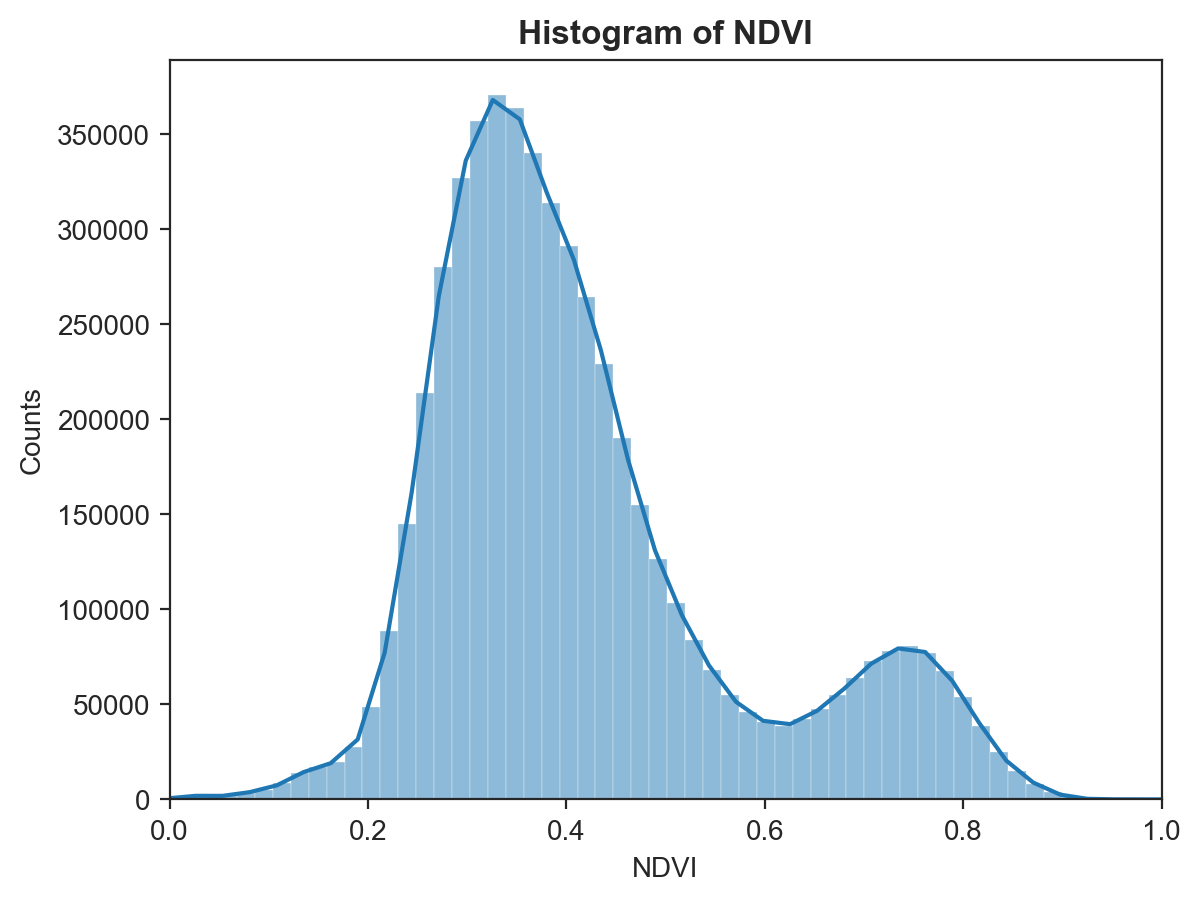

In [31]:
fig, ax = plt.subplots()

sns.histplot(ndvi.flatten(), bins = 300, kde=True);
ax.set_xlim([0,1])
ax.set_ylabel('Counts')
ax.set_xlabel('NDVI')
ax.set_title('Histogram of NDVI', weight = 'bold')

[]

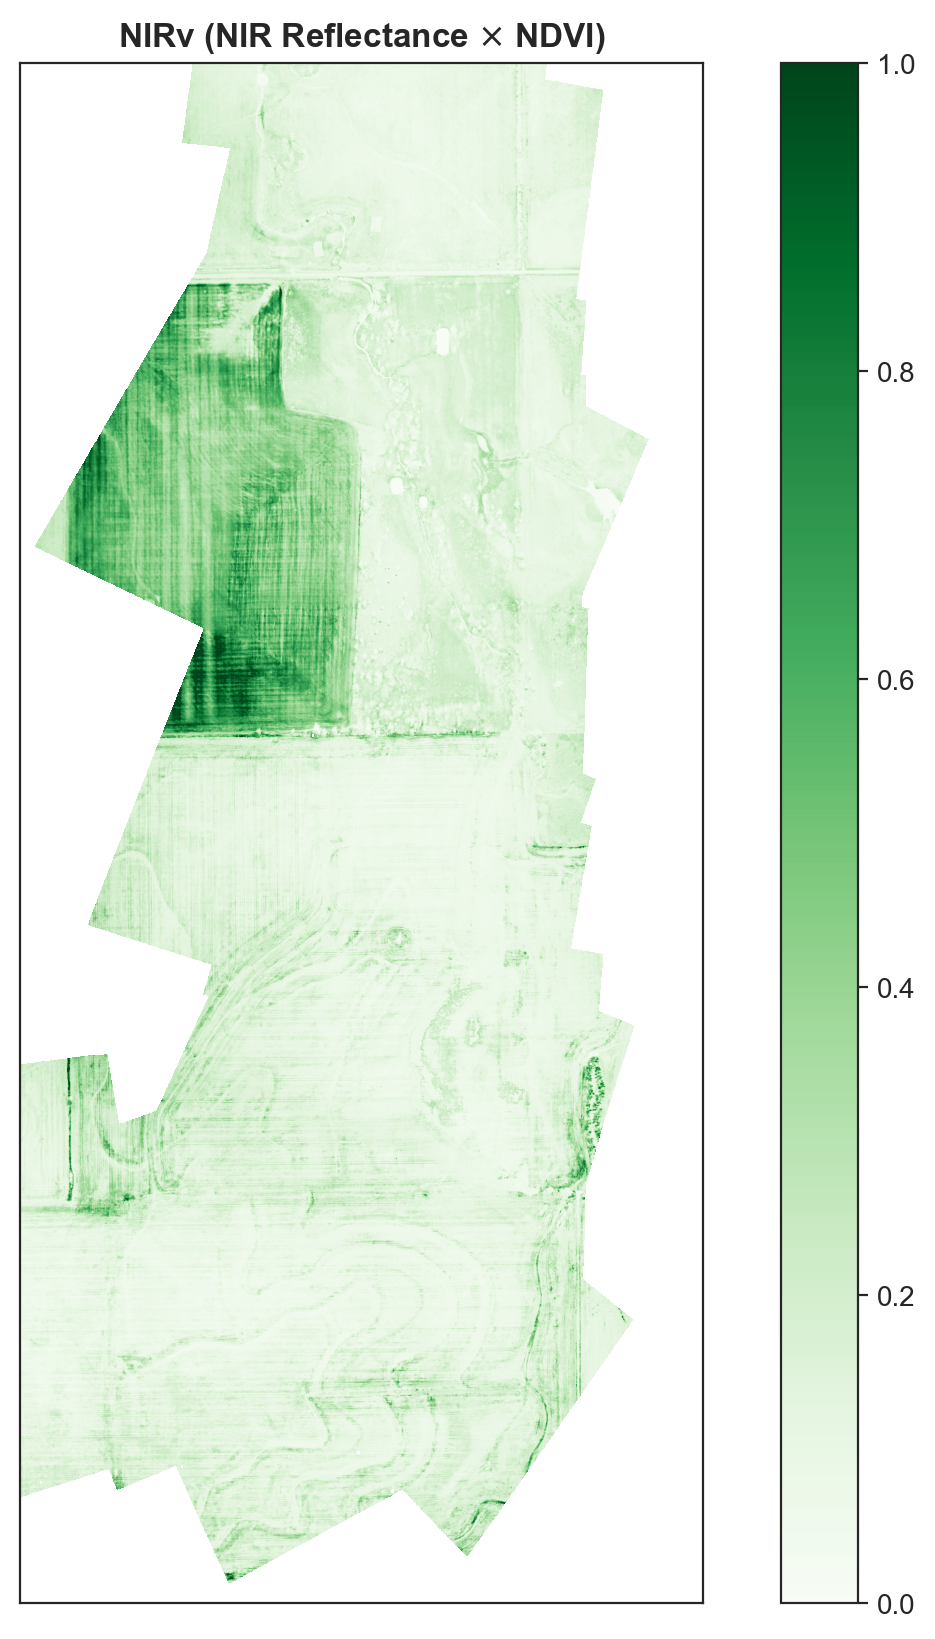

In [25]:
nirv = b5 * ndvi

fig, ax = plt.subplots(figsize = (10, 10))

im = ax.imshow(nirv, cmap = 'Greens', vmin = 0, vmax = 1)
plt.colorbar(im)
ax.set_title('NIRv (NIR Reflectance $\\times$ NDVI)', weight = 'bold')

ax.set_xticks([])
ax.set_yticks([])

Text(0.5, 1.0, 'Histogram of NIRv')

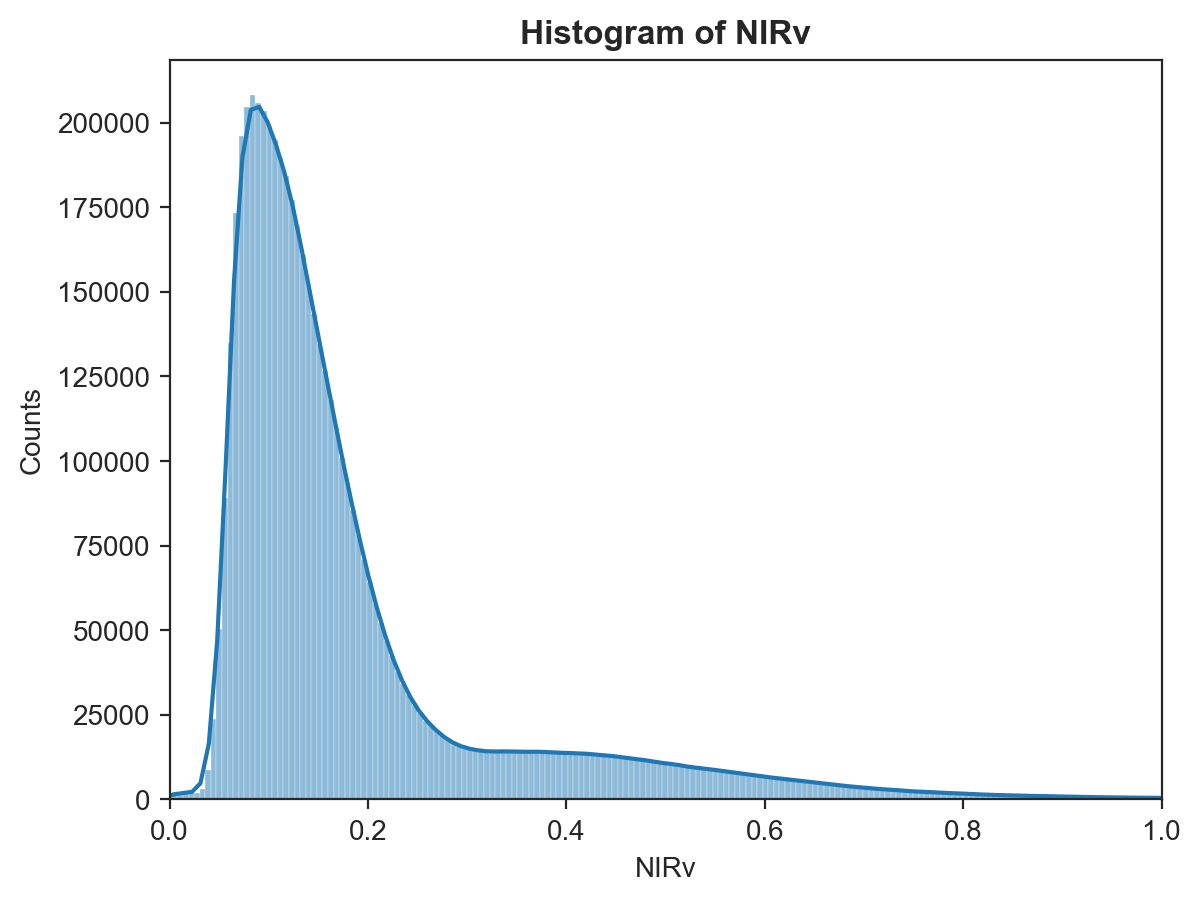

In [32]:
fig, ax = plt.subplots()

sns.histplot(nirv.flatten(), bins = 300, kde=True);
ax.set_xlim([0,1])
ax.set_ylabel('Counts')
ax.set_xlabel('NIRv')
ax.set_title('Histogram of NIRv', weight = 'bold')

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_67847/4194447664.py:11: SyntaxWarning: invalid escape sequence '\d'
  ax2.set_title('Temperature ($\degree$C)', weight = 'bold')
/var/folders/v9/y_rqm4fx0pd7b44v57tn48p00000gn/T/ipykernel_67847/4194447664.py:1: RuntimeWarning: invalid value encountered in divide
  ndwi = (b2 - b5) / (b2 + b5)


Text(0.5, 1.0, 'Temperature ($\\degree$C)')

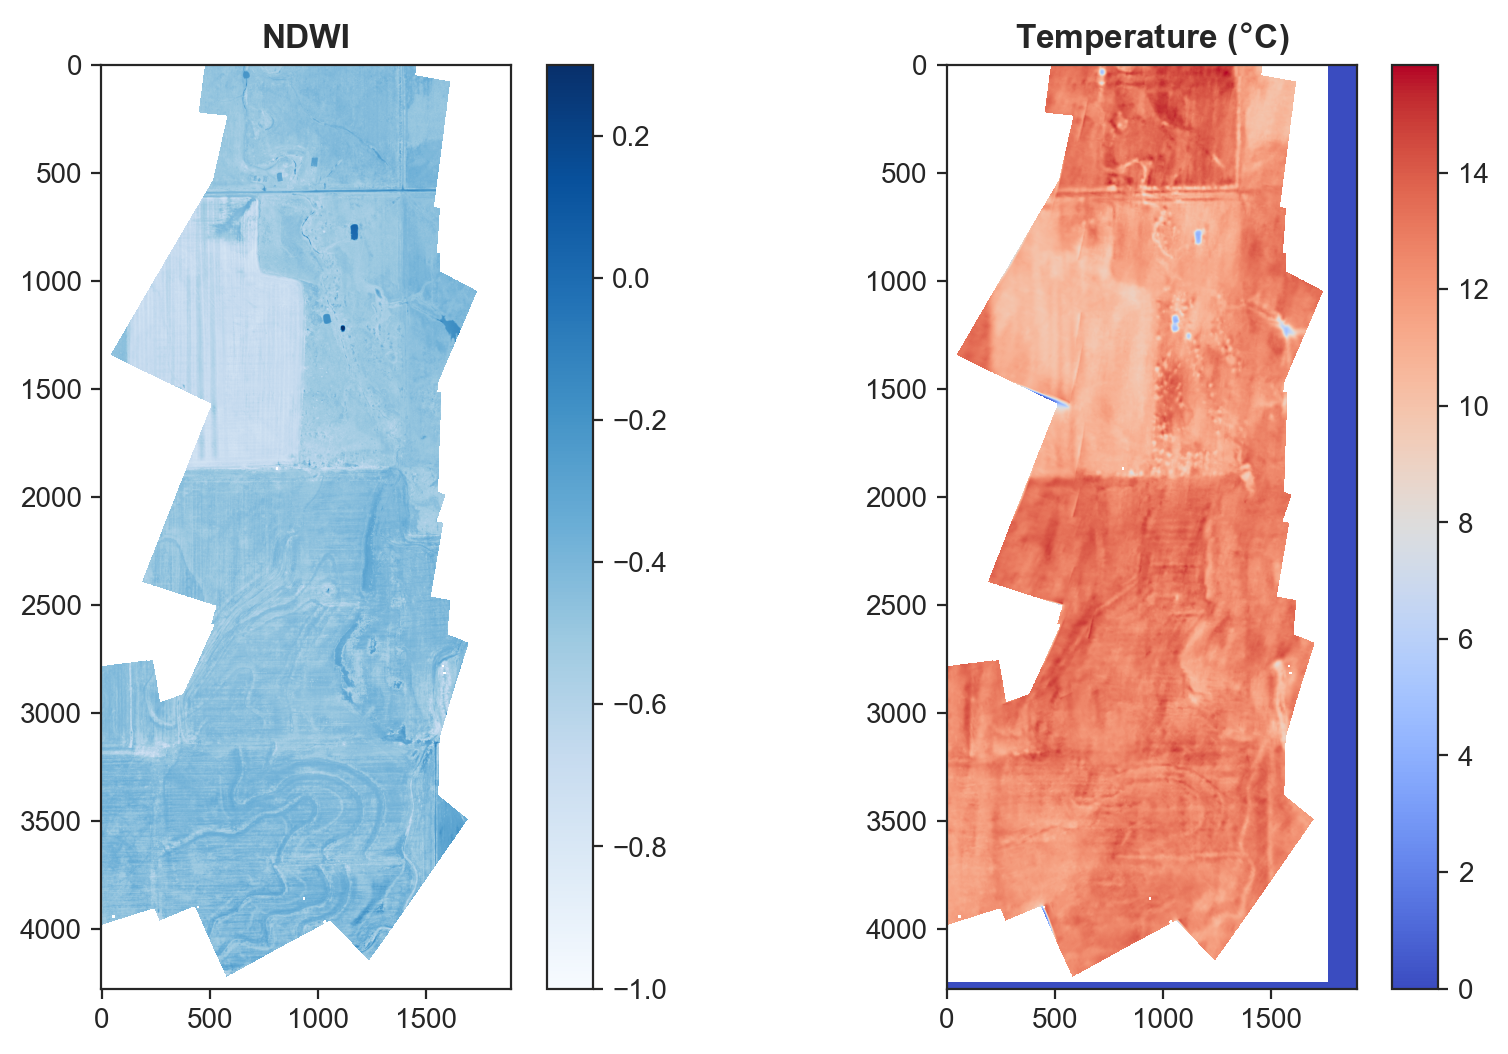

In [41]:
ndwi = (b2 - b5) / (b2 + b5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))

im = ax1.imshow(ndwi, cmap = 'Blues', vmin = -1, vmax = 0.3)
plt.colorbar(im)
ax1.set_title('NDWI', weight = 'bold')

im = ax2.imshow(temp, cmap = 'coolwarm')
plt.colorbar(im)
ax2.set_title('Temperature ($\degree$C)', weight = 'bold')

Text(0.5, 1.0, 'Histogram of NDWI')

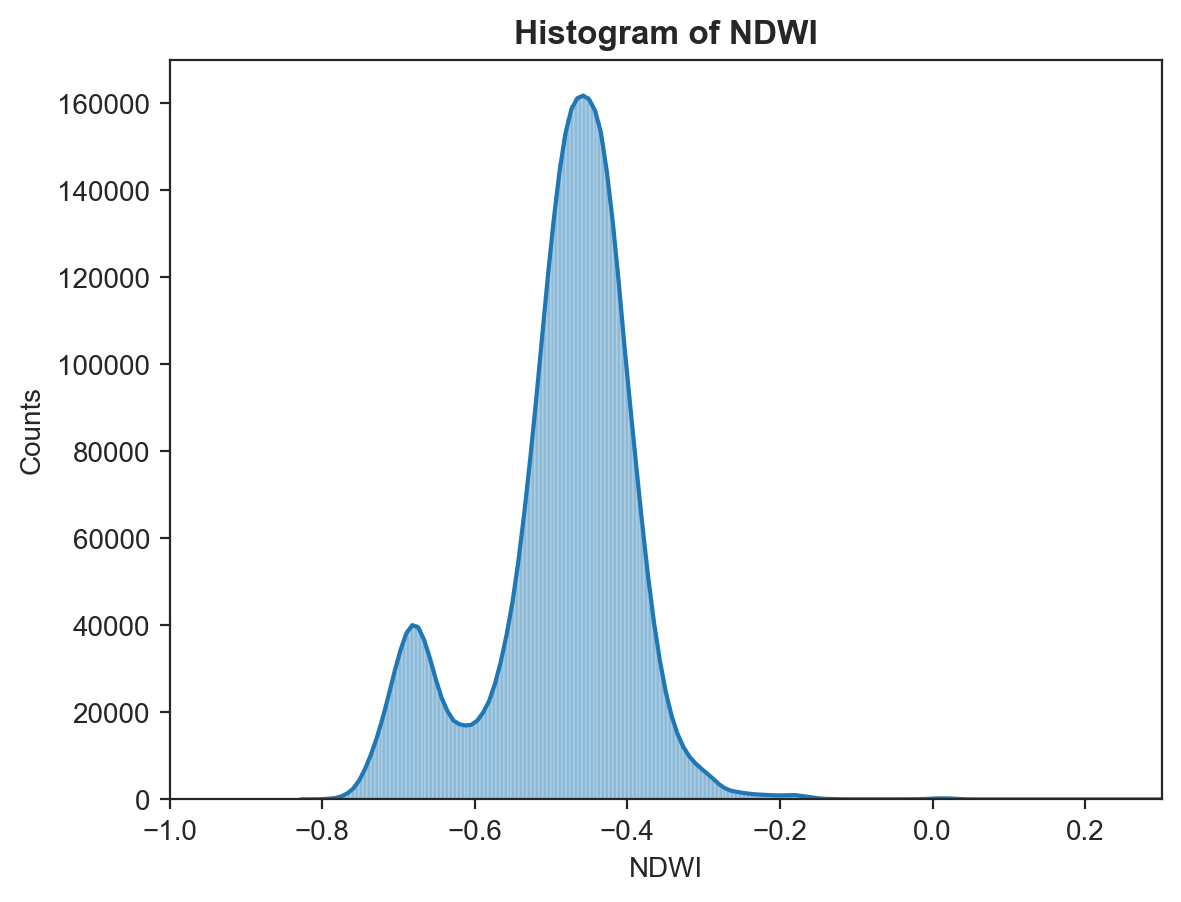

In [51]:
fig, ax = plt.subplots()

sns.histplot(ndwi.flatten(), bins = 300, kde=True);
ax.set_xlim([-1,0.3])
ax.set_ylabel('Counts')
ax.set_xlabel('NDWI')
ax.set_title('Histogram of NDWI', weight = 'bold')